# Install torchdiffeq, yfinance, tslearn

In [1]:
def pip_install_required():
    # Install the latest version of author's repo neural ode implementation
    !git clone https://github.com/rtqichen/torchdiffeq.git
    !cd torchdiffeq && pip install -e .
    !ls torchdiffeq/torchdiffeq
    !pip install yfinance
    !pip install tslearn
pip_install_required()

Cloning into 'torchdiffeq'...
remote: Enumerating objects: 1138, done.
remote: Counting objects: 100% (434/434), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 1138 (delta 256), reused 400 (delta 240), pack-reused 704
Receiving objects: 100% (1138/1138), 8.29 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (682/682), done.
Obtaining file:///content/torchdiffeq
  Running setup.py develop for torchdiffeq
_impl  __init__.py
     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=5d8457ce5ec9d825f3775691c4b5b0de075aab34c4b3f0bc291cdd1ad91b3e46
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 793 kB 5.2 MB/s 

# Get $\mu$ data 

$ \mu_{t} $ is stock price.


In [2]:
# 1. Get Open and Close Price of asset (o, c) for each trading day.
# libraries
from pandas_datareader import data as pdr
import yfinance as yf
import os

print(f"Get Open and Close Price of Assets")
def download_raw_stock_data(filepath, tickers, start, end, period = '1d'):
    """
    Download Stock tickers
    :Parameters:
        filepath: str
            path to store the raw data
        tickers : str, list
            List of tickers to download
        period: str
            the frequency at which to gather the data; common options would include ‘1d’ (daily), ‘1mo’ (monthly), ‘1y’ (yearly)
        start: str
            the date to start gathering the data. For example ‘2010–1–1’
        end: str
            the date to end gathering the data. For example ‘2020–1–25’
    
    """
    #define the ticker symbol
    tickerSymbol = tickers

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period=period, start=start, end=end)
    tickerDf.to_csv(filepath)


def download_data(dict_tickers, path, period, start, end):
    print(f"Get Open and Close Price of Assets")
    if not os.path.exists(path):
        # https://appdividend.com/2021/07/03/how-to-create-directory-if-not-exist-in-python/
        # Create a new directory
        os.makedirs(path)
        print(f"{path} directory is created")
        
    for tickerName, ticker in dict_tickers.items():
        tickerName = tickerName
        ticker = ticker
        filepath = f"{path}/{tickerName}.csv"
        download_raw_stock_data(filepath, ticker, start, end, period)


    print('\n')

    print(f"The size of each asset")
    import pandas as pd
    for tickerName in dict_tickers.keys():
        df = pd.read_csv(f"{path}/{tickerName}.csv")
        print(f"{tickerName} size: {len(df)}")
        
dict_tickers = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Google': 'GOOG',
    'Bitcoin': 'BTC-USD',
    'Facebook': 'FB',
    'Walmart': 'WMT',
    'Amazon': 'AMZN',
    'CVS': 'CVS',
    'Berkshire': 'BRK-B',
    'ExxonMobil': 'XOM',
    'AtandT': 'T',
    'Costco': 'COST',
    'Walgreens': 'WBA',
    'Kroger': 'KR',
    'JPMorgan': 'JPM',
    'Verizon': 'VZ',
    'FordMotor': 'F',
    'GeneralMotors': 'GM',
    'Dell': 'DELL',
    'BankOfAmerica': 'BAC',
    'Target': 'TGT',
    'GeneralElectric': 'GE',
    'JohnsonandJohnson': 'JNJ',
    'Nvidia': 'NVDA',
    'Intel': 'INTC',
}


period = '1d'
start='2000-1-1'
end='2021-8-31'
path = f"raw-stock-data/data-{start.split('-')[0]}-{end.split('-')[0]}"
download_data(dict_tickers, path, period, start, end)


Get Open and Close Price of Assets
Get Open and Close Price of Assets
raw-stock-data/data-2000-2021 directory is created


The size of each asset
Apple size: 5450
Microsoft size: 5450
Google size: 4288
Bitcoin size: 2537
Facebook size: 2336
Walmart size: 5450
Amazon size: 5450
CVS size: 5450
Berkshire size: 5450
ExxonMobil size: 5450
AtandT size: 5450
Costco size: 5450
Walgreens size: 5450
Kroger size: 5450
JPMorgan size: 5450
Verizon size: 5450
FordMotor size: 5450
GeneralMotors size: 2713
Dell size: 1268
BankOfAmerica size: 5450
Target size: 5450
GeneralElectric size: 5450
JohnsonandJohnson size: 5450
Nvidia size: 5451
Intel size: 5450


In [4]:
import pandas as pd
pd.read_csv(f"raw-stock-data/data-2000-2021/Apple.csv")['Open'].values.shape

(5450,)

In [5]:
def bundle_data(path):
    data = {}
    for tickerName in dict_tickers.keys():
        data[tickerName] = pd.read_csv(f"{path}/{tickerName}.csv")['Open'].values
    return data

In [6]:
start='2000-1-1'
end='2021-8-31'
path = f"raw-stock-data/data-{start.split('-')[0]}-{end.split('-')[0]}"
raw_data_dict = bundle_data(path)

In [7]:
def get_bundle(raw_data_dict):
    data = raw_data_dict['Apple']
    # 4. Bundle all sequences together
    for tickerName in raw_data_dict.keys():
        if tickerName != 'Apple':
            data1 = raw_data_dict[tickerName]
            data = np.concatenate((data, data1))
            
            print(f"data.shape {data.shape}")
    return data
import numpy as np
mu_data = get_bundle(raw_data_dict)


data.shape (10900,)
data.shape (15188,)
data.shape (17725,)
data.shape (20061,)
data.shape (25511,)
data.shape (30961,)
data.shape (36411,)
data.shape (41861,)
data.shape (47311,)
data.shape (52761,)
data.shape (58211,)
data.shape (63661,)
data.shape (69111,)
data.shape (74561,)
data.shape (80011,)
data.shape (85461,)
data.shape (88174,)
data.shape (89442,)
data.shape (94892,)
data.shape (100342,)
data.shape (105792,)
data.shape (111242,)
data.shape (116693,)
data.shape (122143,)


In [8]:
mu_data.shape

(122143,)

# Get $\sigma$ data

$ \sigma_{t}^{2} = \sigma_{0}^2 * t + \epsilon $ 

where $ t $ goes from $ (0, datasize) $ and $ \epsilon $ is a `np.random.random().

In [9]:
sigma_0 = 1./mu_data.shape[0]
def get_sigma_values(sigma_0, t, epsilon):
    return sigma_0 * t + epsilon

In [10]:
t = np.arange(1, mu_data.shape[0])
print(t.shape)
t


(122142,)


array([     1,      2,      3, ..., 122140, 122141, 122142])

In [11]:
np.random.random()/mu_data.shape[0]

3.7787615916071633e-07

In [12]:
def get_sigma_data(sigma_0):
    data = [0 for i in range(mu_data.shape[0])]
    data[0] = sigma_0
    for i in range(1, mu_data.shape[0]):
        data[i] = get_sigma_values(sigma_0, i, np.random.random())
    return data

In [13]:
sigma_0 = 1.
sigma_data = get_sigma_data(sigma_0)
print(len(sigma_data))

122143


# Get data

In [ ]:
x = np.linspace(-10,10,100)

In [ ]:
arr = norm.pdf(x)
arr

array([7.69459863e-23, 5.68442201e-22, 4.03145816e-21, 2.74481769e-20,
       1.79407401e-19, 1.12575195e-18, 6.78141882e-18, 3.92169602e-17,
       2.17722239e-16, 1.16039850e-15, 5.93727315e-15, 2.91636853e-14,
       1.37522348e-13, 6.22557774e-13, 2.70558725e-12, 1.12880502e-11,
       4.52118024e-11, 1.73844203e-10, 6.41717835e-10, 2.27406833e-09,
       7.73639102e-09, 2.52667171e-08, 7.92199799e-08, 2.38449349e-07,
       6.89021948e-07, 1.91137312e-06, 5.09018302e-06, 1.30135811e-05,
       3.19400618e-05, 7.52575687e-05, 1.70231576e-04, 3.69662637e-04,
       7.70631042e-04, 1.54227900e-03, 2.96315857e-03, 5.46540492e-03,
       9.67754721e-03, 1.64506763e-02, 2.68458845e-02, 4.20578610e-02,
       6.32546052e-02, 9.13298239e-02, 1.26592680e-01, 1.68453513e-01,
       2.15192461e-01, 2.63906165e-01, 3.10704486e-01, 3.51172916e-01,
       3.81039507e-01, 3.96912251e-01, 3.96912251e-01, 3.81039507e-01,
       3.51172916e-01, 3.10704486e-01, 2.63906165e-01, 2.15192461e-01,
      

In [ ]:
arr = np.reshape(arr, (1, arr.shape[0]))

In [ ]:
np.concatenate((arr, arr), axis = 0)

array([[7.69459863e-23, 5.68442201e-22, 4.03145816e-21, 2.74481769e-20,
        1.79407401e-19, 1.12575195e-18, 6.78141882e-18, 3.92169602e-17,
        2.17722239e-16, 1.16039850e-15, 5.93727315e-15, 2.91636853e-14,
        1.37522348e-13, 6.22557774e-13, 2.70558725e-12, 1.12880502e-11,
        4.52118024e-11, 1.73844203e-10, 6.41717835e-10, 2.27406833e-09,
        7.73639102e-09, 2.52667171e-08, 7.92199799e-08, 2.38449349e-07,
        6.89021948e-07, 1.91137312e-06, 5.09018302e-06, 1.30135811e-05,
        3.19400618e-05, 7.52575687e-05, 1.70231576e-04, 3.69662637e-04,
        7.70631042e-04, 1.54227900e-03, 2.96315857e-03, 5.46540492e-03,
        9.67754721e-03, 1.64506763e-02, 2.68458845e-02, 4.20578610e-02,
        6.32546052e-02, 9.13298239e-02, 1.26592680e-01, 1.68453513e-01,
        2.15192461e-01, 2.63906165e-01, 3.10704486e-01, 3.51172916e-01,
        3.81039507e-01, 3.96912251e-01, 3.96912251e-01, 3.81039507e-01,
        3.51172916e-01, 3.10704486e-01, 2.63906165e-01, 2.151924

Then, we will sample: 
$
X \sim N(\mu_{t},\sigma_{t}^2) \\
$

In [14]:
def generate_data(mu_data, sigma_data):
    x = np.linspace(-10,10,100)
    data = norm.pdf(x, loc = mu_data[0], scale = sigma_data[0])
    data = np.reshape(data, (1, data.shape[0]))
    for i in range(1, mu_data.shape[0]):
        data1 = norm.pdf(x, loc = mu_data[i], scale=sigma_data[i])
        data1 = np.reshape(data1, (1, data1.shape[0]))
        data = np.concatenate((data, data1), axis=0)
    
    return data

In [15]:
def save_data(data, filepath):
    df = pd.DataFrame(data)
    df.to_csv(f"{filepath}.csv", index=0)

In [31]:
def plot_data(filepath, tickerName, htmlpath):
    import plotly.graph_objects as go
    import numpy as np
    df = pd.read_csv(f"{filepath}.csv")
    z = df.values
    sh_0, sh_1 = z.shape
    t, x = np.linspace(0, sh_0, sh_0+1), np.linspace(0, sh_1, sh_1+1)
    fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=t)])

    fig.update_layout(title=f'Data Generation using {tickerName} stock as mu', autosize=False,
                      width=500, height=500,
                      margin=dict(l=65, r=50, b=65, t=90))
    fig.update_xaxes(title_text="x")
    fig.update_yaxes(title_text="time")
    fig.show()
    fig.write_html(f"{htmlpath}.html")
    return fig
    


## Apple

In [33]:
# Apple
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tickerName = 'Apple'
mu_data = raw_data_dict[tickerName]
sigma_0 = 1.0
sigma_data = get_sigma_data(sigma_0)
data = generate_data(mu_data[-100:], sigma_data[:100])
filepath = f"{tickerName}-mu-data-generated"
save_data(data, filepath)
htmlpath = f"{tickerName}-mu-data-generated"
fig = plot_data(filepath, tickerName, htmlpath)


# Microsoft

In [34]:

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tickerName = 'Microsoft'
mu_data = raw_data_dict[tickerName]
sigma_0 = 1.0
sigma_data = get_sigma_data(sigma_0)
data = generate_data(mu_data[-100:], sigma_data[:100])
filepath = f"{tickerName}-mu-data-generated"
save_data(data, filepath)
htmlpath = f"{tickerName}-mu-data-generated"
fig = plot_data(filepath, tickerName, htmlpath)


## Nvidia


In [35]:

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tickerName = 'Nvidia'
mu_data = raw_data_dict[tickerName]
sigma_0 = 1.0
sigma_data = get_sigma_data(sigma_0)
data = generate_data(mu_data[-100:], sigma_data[:100])
filepath = f"{tickerName}-mu-data-generated"
save_data(data, filepath)
htmlpath = f"{tickerName}-mu-data-generated"
fig = plot_data(filepath, tickerName, htmlpath)


## Facebook

In [36]:

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tickerName = 'Facebook'
mu_data = raw_data_dict[tickerName]
sigma_0 = 1.0
sigma_data = get_sigma_data(sigma_0)
data = generate_data(mu_data[-100:], sigma_data[:100])
filepath = f"{tickerName}-mu-data-generated"
save_data(data, filepath)
htmlpath = f"{tickerName}-mu-data-generated"
fig = plot_data(filepath, tickerName, htmlpath)


In [ ]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,7.694599e-23,5.684422e-22,4.031458e-21,2.744818e-20,1.794074e-19,1.125752e-18,6.781419e-18,3.921696e-17,2.177222e-16,1.160399e-15,5.937273e-15,2.916369e-14,1.375223e-13,6.225578e-13,2.705587e-12,1.128805e-11,4.521180e-11,1.738442e-10,6.417178e-10,2.274068e-09,7.736391e-09,2.526672e-08,7.921998e-08,2.384493e-07,6.890219e-07,1.911373e-06,5.090183e-06,1.301358e-05,3.194006e-05,7.525757e-05,1.702316e-04,3.696626e-04,7.706310e-04,1.542279e-03,2.963159e-03,5.465405e-03,9.677547e-03,1.645068e-02,2.684588e-02,4.205786e-02,...,4.205786e-02,2.684588e-02,1.645068e-02,9.677547e-03,5.465405e-03,2.963159e-03,1.542279e-03,7.706310e-04,3.696626e-04,1.702316e-04,7.525757e-05,3.194006e-05,1.301358e-05,5.090183e-06,1.911373e-06,6.890219e-07,2.384493e-07,7.921998e-08,2.526672e-08,7.736391e-09,2.274068e-09,6.417178e-10,1.738442e-10,4.521180e-11,1.128805e-11,2.705587e-12,6.225578e-13,1.375223e-13,2.916369e-14,5.937273e-15,1.160399e-15,2.177222e-16,3.921696e-17,6.781419e-18,1.125752e-18,1.794074e-19,2.744818e-20,4.031458e-21,5.684422e-22,7.694599e-23
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2.032605e-254,4.707463e-253,1.081009e-251,2.461389e-250,5.556992e-249,1.243964e-247,2.761113e-246,6.076719e-245,1.326058e-243,2.869225e-242,6.155668e-241,1.309466e-239,2.761988e-238,5.776407e-237,1.197850e-235,2.462949e-234,5.021310e-233,1.015049e-231,2.034538e-230,4.043457e-229,7.967984e-228,1.556871e-226,3.016236e-225,5.794106e-224,1.103611e-222,2.084272e-221,3.903022e-220,7.246966e-219,1.334197e-217,2.435523e-216,4.408318e-215,7.911561e-214,1.407862e-212,2.484084e-211,4.345913e-210,7.538837e-209,1.296690e-207,2.211447e-206,3.739602e-205,6.270219e-204,...,4.551488e-179,6.329917e-178,8.728731e-177,1.193473e-175,1.618

In [ ]:
data = generate_data(mu_data[-100:], sigma_data[:100])

In [ ]:
df = pd.DataFrame(data)
df.to_csv("trial-1-generated-data.csv", index=0)

In [ ]:
import plotly.graph_objects as go
import numpy as np
z= df.values
print(z.shape)
sh_0, sh_1 = z.shape


(100, 100)


In [ ]:
np.linspace(0, 100, 101)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
t, x = np.linspace(0, sh_0, sh_0+1), np.linspace(0, sh_1, sh_1+1)
fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=t)])

fig.update_layout(title=f'PDF Evolution', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

In [ ]:
fig.write_html("trial-1-data-generation.html")

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv("data.csv").drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),tickerName
0,0.803995,0.858137,0.829868,0.785788,0.795370,0.797286,0.813578,0.728290,0.739790,0.762789,0.781954,0.749373,0.735478,0.711042,0.728290,0.668399,0.724337,0.741706,0.766622,0.769975,0.774288,0.796807,0.809744,0.816931,0.885448,0.870116,0.875865,0.853346,0.831305,0.814536,0.804953,0.860533,0.843284,0.844721,0.834180,0.843284,0.829389,0.779080,0.774288,0.795370,0.797286,0.768538,0.772372,0.757518,0.769017,0.792016,0.796807,0.827952,0.827952,0.874428,0.873949,0.880657,0.874907,0.863407,0.865325,0.870116,0.871074,0.833701,0.838013,0.887844,Apple
1,0.781954,0.749373,0.735478,0.711042,0.728290,0.668399,0.724337,0.741706,0.766622,0.769975,0.774288,0.796807,0.809744,0.816931,0.885448,0.870116,0.875865,0.853346,0.831305,0.814536,0.804953,0.860533,0.843284,0.844721,0.834180,0.843284,0.829389,0.779080,0.774288,0.795370,0.797286,0.768538,0.772372,0.757518,0.769017,0.792016,0.796807,0.827952,0.827952,0.874428,0.873949,0.880657,0.874907,0.863407,0.865325,0.870116,0.871074,0.833701,0.838013,0.887844,0.883532,0.912280,0.902697,0.874907,0.883053,0.880657,0.878741,0.852867,0.844242,0.872511,Apple
2,0.774288,0.796807,0.809744,0.816931,0.885448,0.870116,0.875865,0.853346,0.831305,0.814536,0.804953,0.860533,0.843284,0.844721,0.834180,0.843284,0.829389,0.779080,0.774288,0.795370,0.797286,0.768538,0.772372,0.757518,0.769017,0.792016,0.796807,0.827952,0.827952,0.874428,0.873949,0.880657,0.874907,0.863407,0.865325,0.870116,0.871074,0.833701,0.838013,0.887844,0.883532,0.912280,0.902697,0.874907,0.883053,0.880657,0.878741,0.852867,0.844242,0.872511,0.868079,0.891198,0.899343,0.883172,0.880178,0.846159,0.844242,0.868199,0.870595,0.878741,Apple
3,0.804953,0.860533,0.843284,0.844721,0.834180,0.843284,0.829389,0.779080,0.774288,0.795370,0.797286,0.768538,0.772372,0.757518,0.769017,0.792016,0.796807,0.827952,0.827952,0.874428,0.873949,0.880657,0.874907,0.863407,0.865325,0.870116,0.871074,0.833701,0.838013,0.887844,0.883532,0.912280,0.902697,0.874907,0.883053,0.880657,0.878741,0.852867,0.844242,0.872511,0.868079,0.891198,0.899343,0.883172,0.880178,0.846159,0.844242,0.868199,0.870595,0.878741,0.908926,0.999003,0.973610,0.935279,0.957319,0.981276,0.965943,0.963548,0.969297,0.941986,Apple
4,0.797286,0.768538,0.772372,0.757518,0.769017,0.792016,0.796807,0.827952,0.827952,0.874428,0.873949,0.880657,0.874907,0.863407,0.865325,0.870116,0.871074,0.833701,0.838013,0.887844,0.883532,0.912280,0.902697,0.874907,0.883053,0.880657,0.878741,0.852867,0.844242,0.872511,0.868079,0.891198,0.899343,0.883172,0.880178,0.846159,0.844242,0.868199,0.870595,0.878741,0.908926,0.999003,0.973610,0.935279,0.957319,0.981276,0.965943,0.963548,0.969297,0.941986,0.941986,0.935279,0.926654,0.937195,0.932884,0.964027,0.936237,0.930008,0.929289,0.875865,Apple


In [ ]:
def data_generator():
    

# [Reference](https://nbviewer.org/github/shinokada/python-for-ib-diploma-mathematics/blob/master/Normal_distribution.ipynb)

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

norm.pdf(x=1.0, loc=0, scale=1)


0.24197072451914337

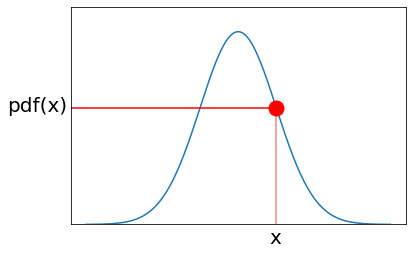

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45) # range
ax.axhline(y=0.24,xmax=0.61,color='r') # horizontal line
ax.axvline(x=1, ymax=0.53, color='r',alpha=0.5) # vertical line
xplot = ax.plot([1], [0.24], marker='o', markersize=15, color="red") # coordinate point
ax.set_yticks([]) # remove y axis label
ax.set_xticks([]) # remove x axis label
ax.set_xlabel('x',fontsize=20) # set x label
ax.set_ylabel('pdf(x)',fontsize=20,rotation=0) # set y label
ax.xaxis.set_label_coords(0.61, -0.02) # x label coordinate
ax.yaxis.set_label_coords(-0.1, 0.5) # y label coordinate
plt.show()

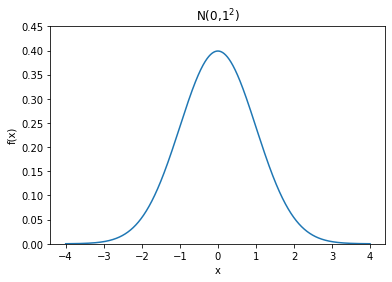

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)

plt.show()

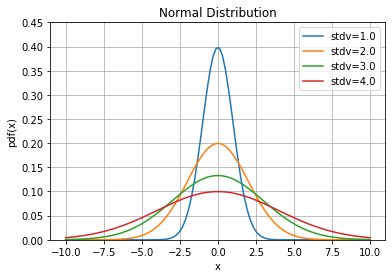

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]

for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

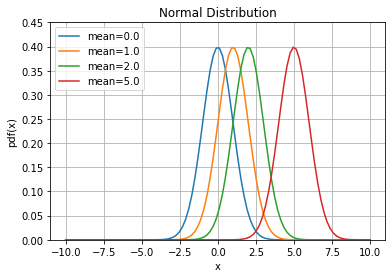

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]

for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

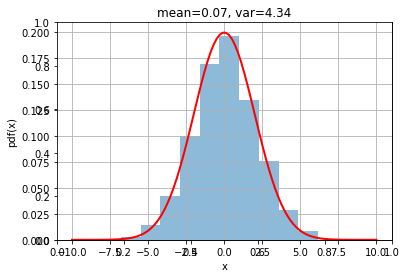

In [ ]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)

ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)

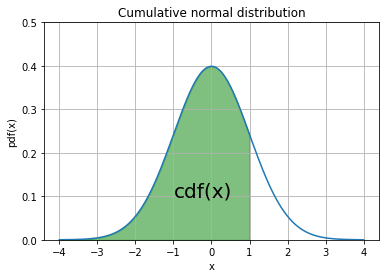

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

In [ ]:
from scipy.stats import norm

lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

0.3085375387259869


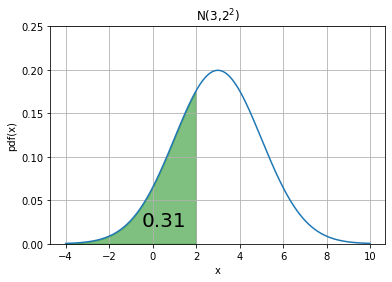

In [ ]:
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')

# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

In [ ]:
norm.ppf(q=0.506, loc=1, scale=3)

1.045121010035907

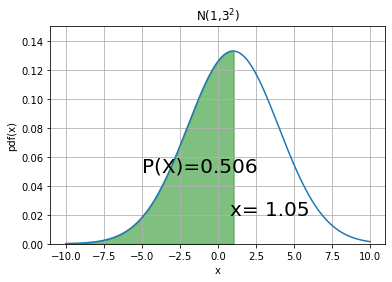

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')

ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

Text(0.5, 1.0, 'pdf')

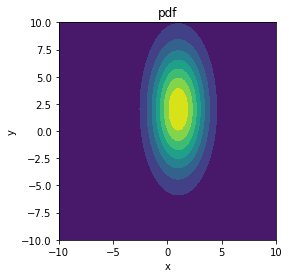

In [ ]:
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')